In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('CalibrationFolder/gaze_calibration_kenny_1.csv', sep=',')

# Map TrialID to camera motion type and object speed based on an external mapping file
def map_camera_motion_type_and_object_speed(data_df, trial_details_df):
    data_df = data_df.merge(trial_details_df[['trial_id', 'camera_motion_type', 'object_speed', 'camera_speed', 'object_motion_type']],
                            left_on='TrialID', right_on='trial_id', how='left')
    return data_df

# Screen resolution
screen_width = 2560
screen_height = 1440

# Process data
data['RelativeTime'] = data.groupby('CalibrationNumber')['Time'].transform(lambda x: x - x.min())
data['MappedPogX'] = data['BestPogX'] * screen_width
data['MappedPogY'] = data['BestPogY'] * screen_height

data['MappedPogY'] = screen_height - data['MappedPogY']

data[['CrosshairX', 'CrosshairY']] = data['CrosshairPosition'].str.extract(r'\((\d+\.?\d*)\s(\d+\.?\d*)\)').astype(float)
data = data[(data['CrosshairX'] >= 0) & (data['CrosshairY'] >= 0)]

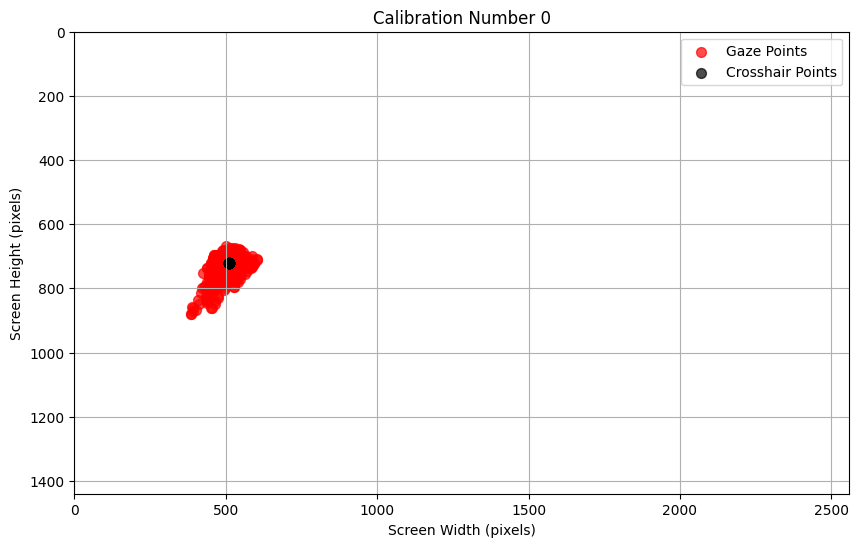

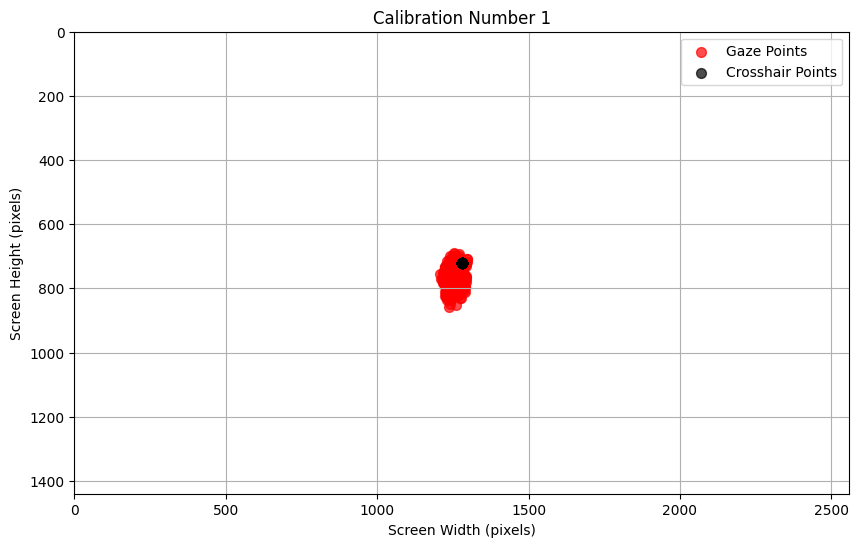

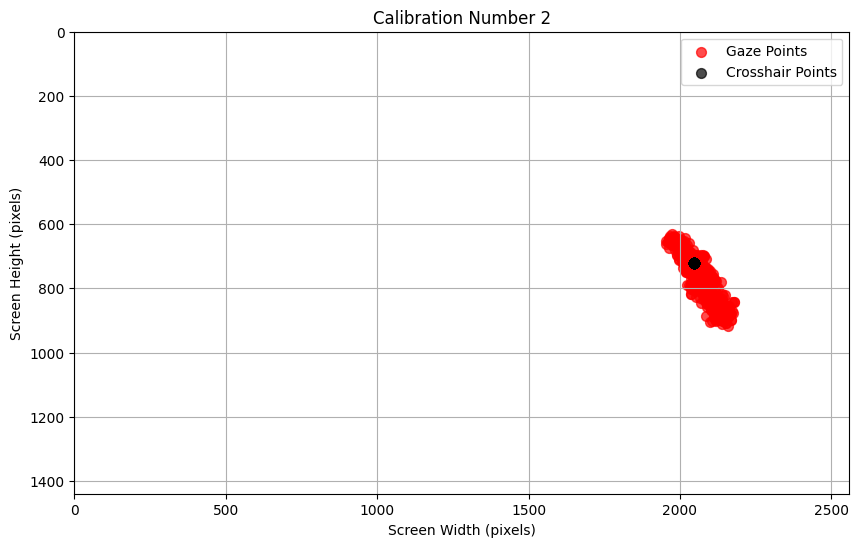

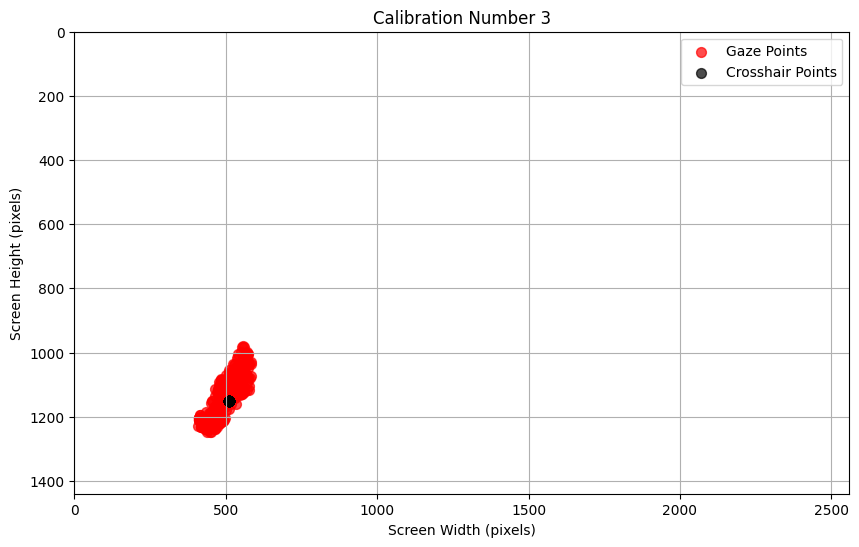

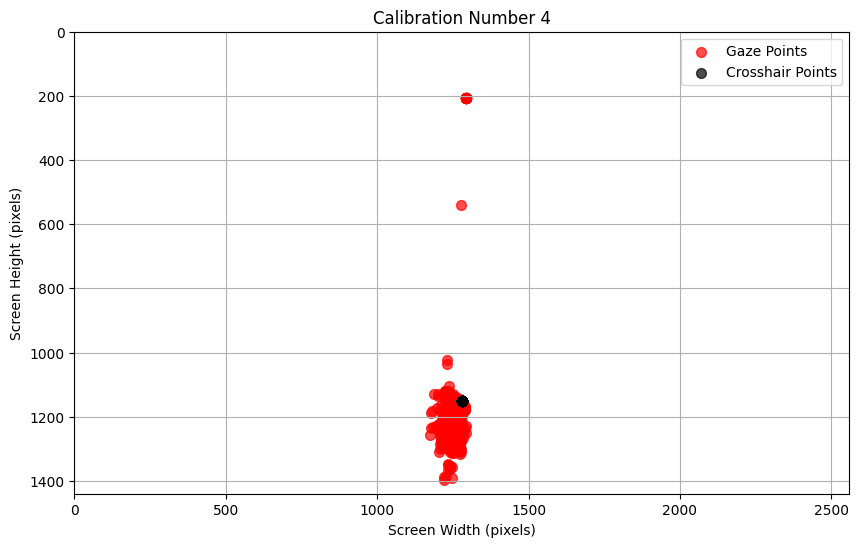

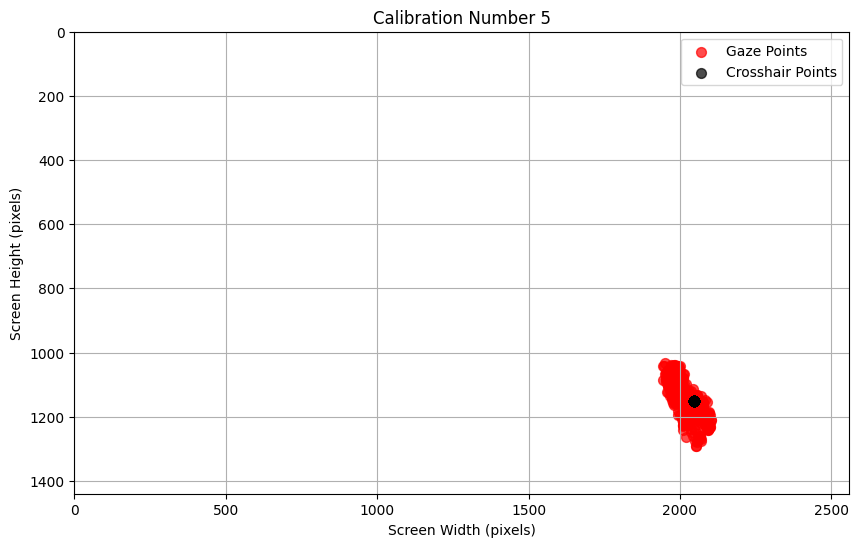

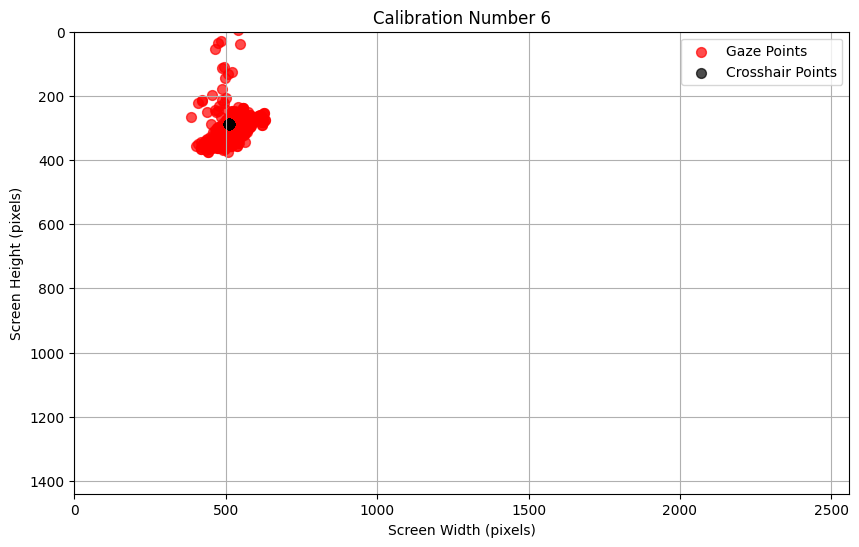

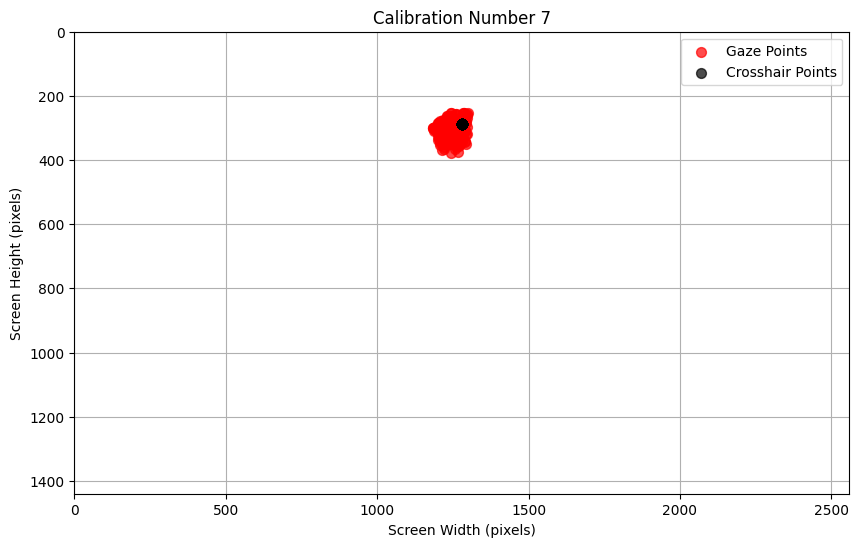

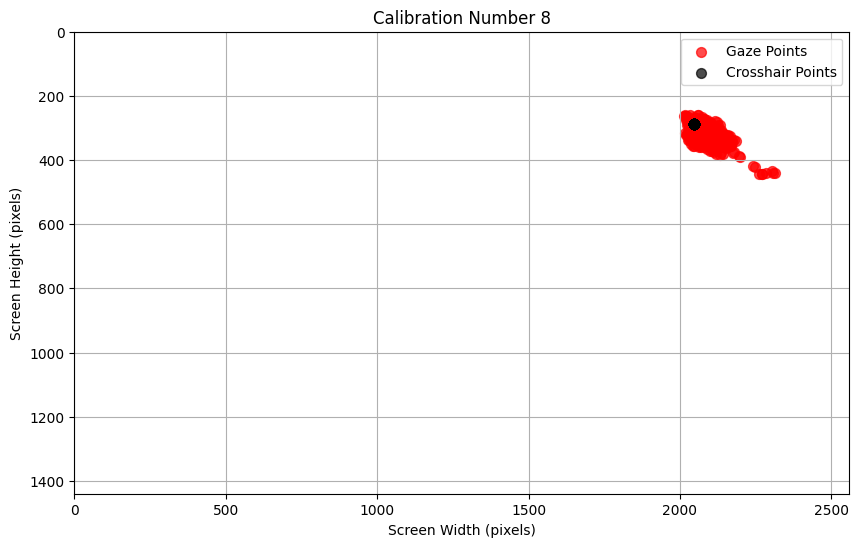

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterate through each unique CalibrationNumber
for calibration_number in data['CalibrationNumber'].unique():
    # Filter data for the current calibration number
    calibration_data = data[data['CalibrationNumber'] == calibration_number]

    # Create a 2D plot of the screen size
    plt.figure(figsize=(10, 6))

    plt.scatter(
        calibration_data['MappedPogX'], 
        calibration_data['MappedPogY'], 
        color='red', 
        label='Gaze Points', 
        alpha=0.7, 
        s=50
    )

    plt.scatter(
        calibration_data['CrosshairX'], 
        calibration_data['CrosshairY'], 
        color='black', 
        label='Crosshair Points', 
        alpha=0.7, 
        s=50
    )
    
    # Set plot limits to the screen size
    plt.xlim(0, screen_width)
    plt.ylim(0, screen_height)

    # Add labels, title, and legend
    plt.title(f'Calibration Number {calibration_number}')
    plt.xlabel('Screen Width (pixels)')
    plt.ylabel('Screen Height (pixels)')
    plt.legend()
    plt.gca().invert_yaxis()  # Invert the y-axis to match screen coordinate system

    # Show the plot
    plt.grid(True)
    plt.show()


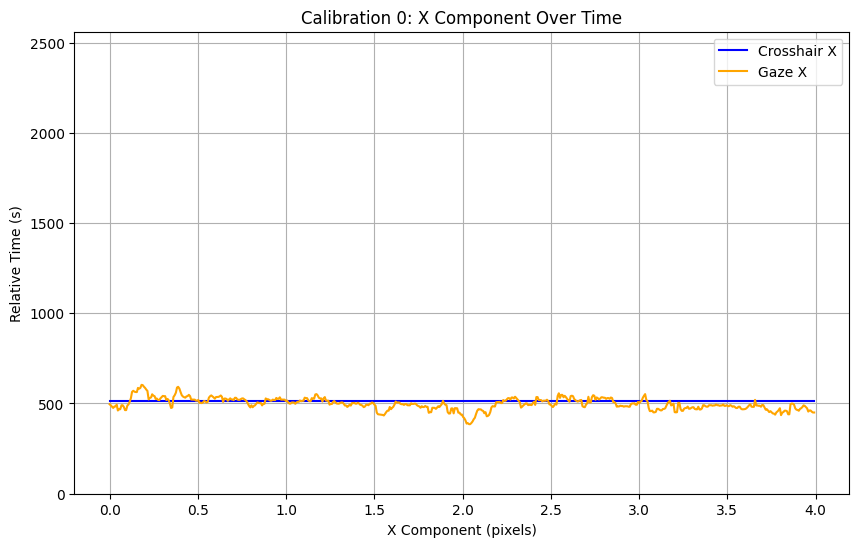

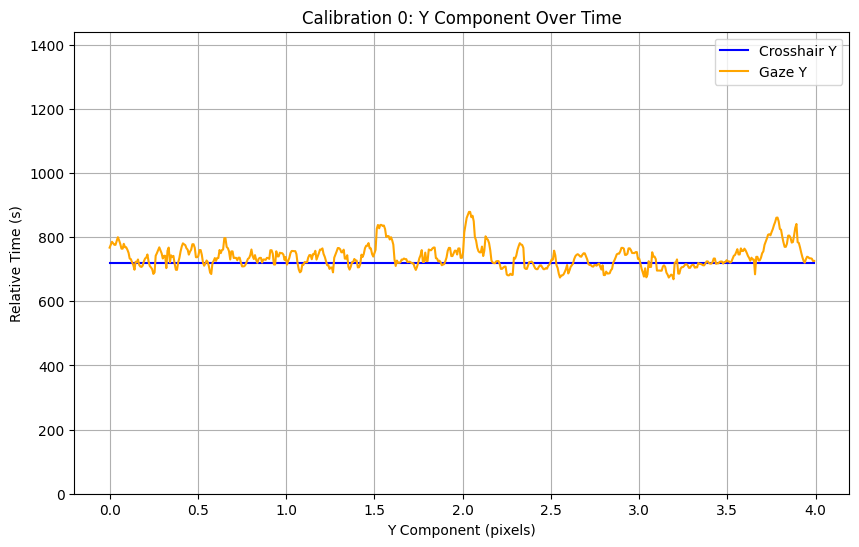

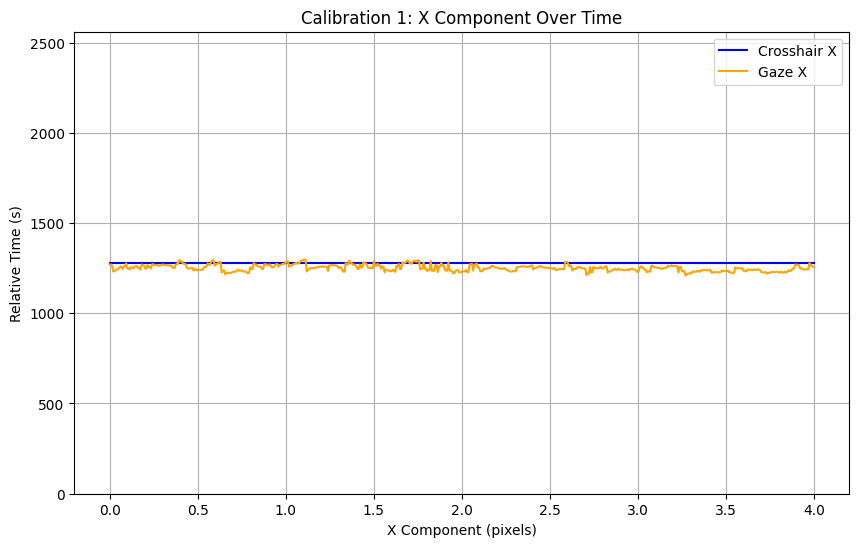

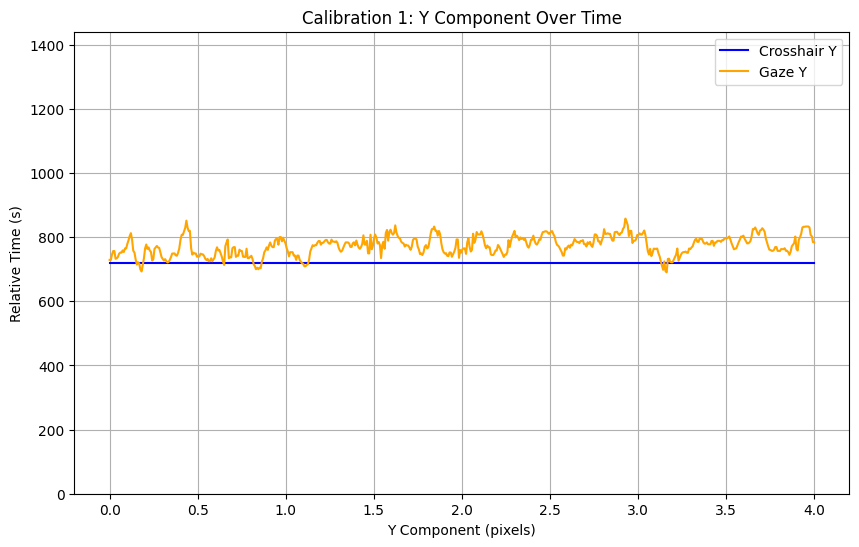

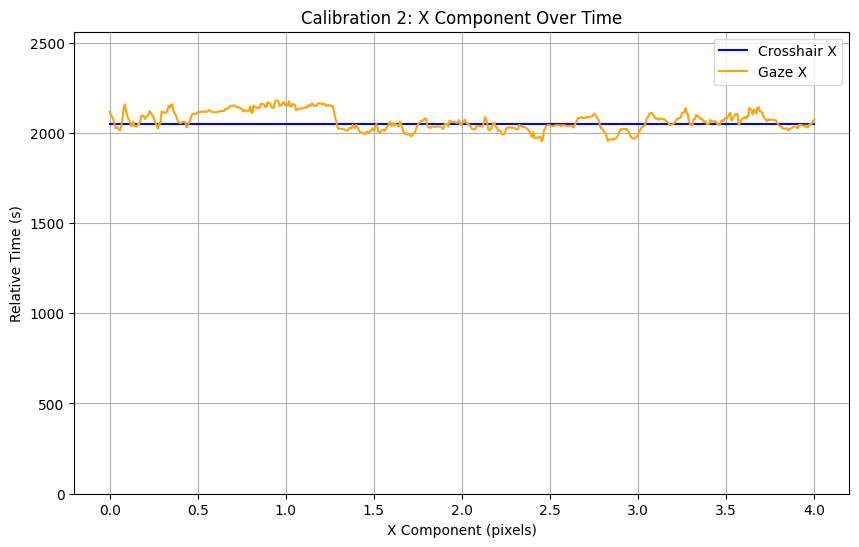

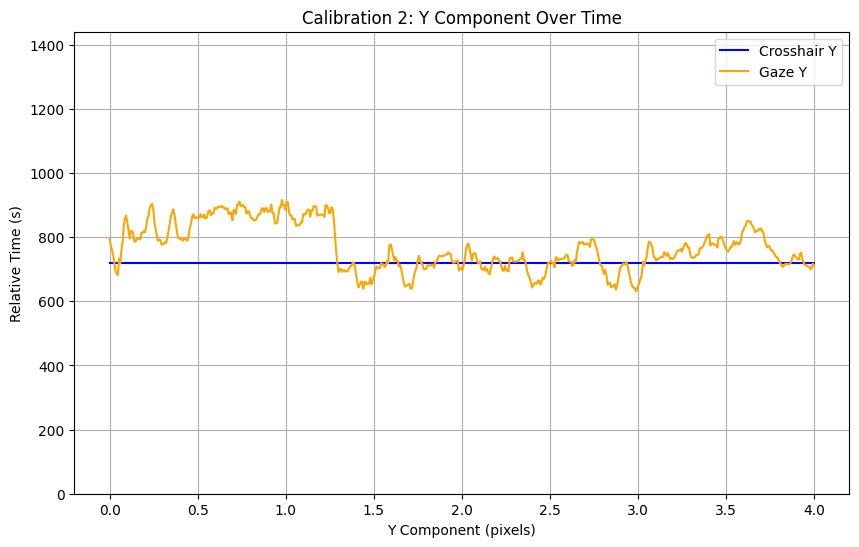

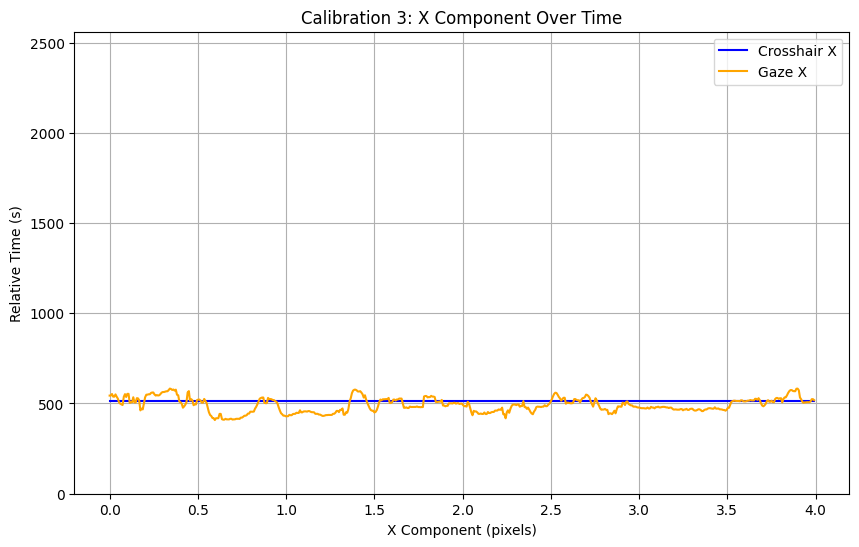

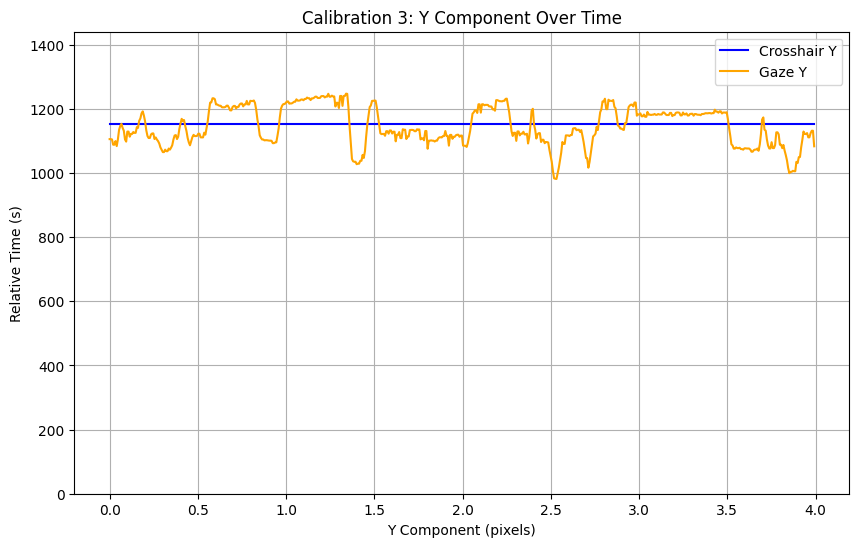

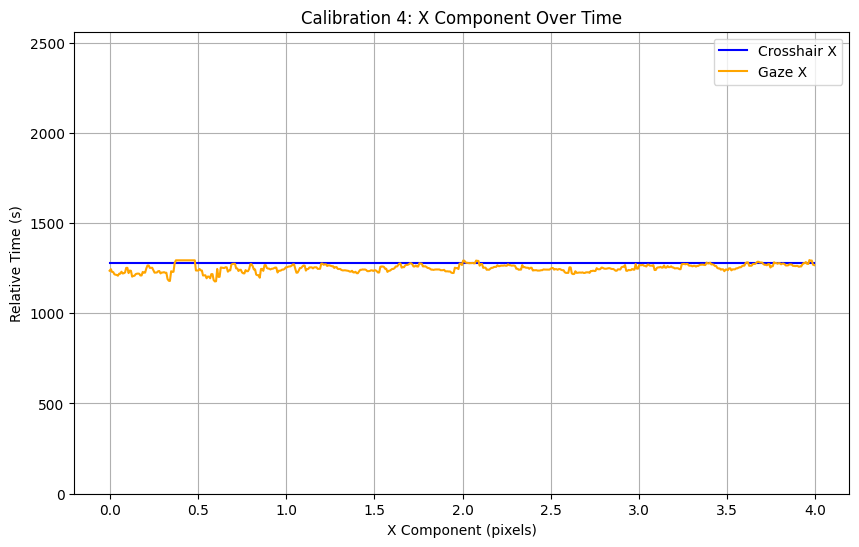

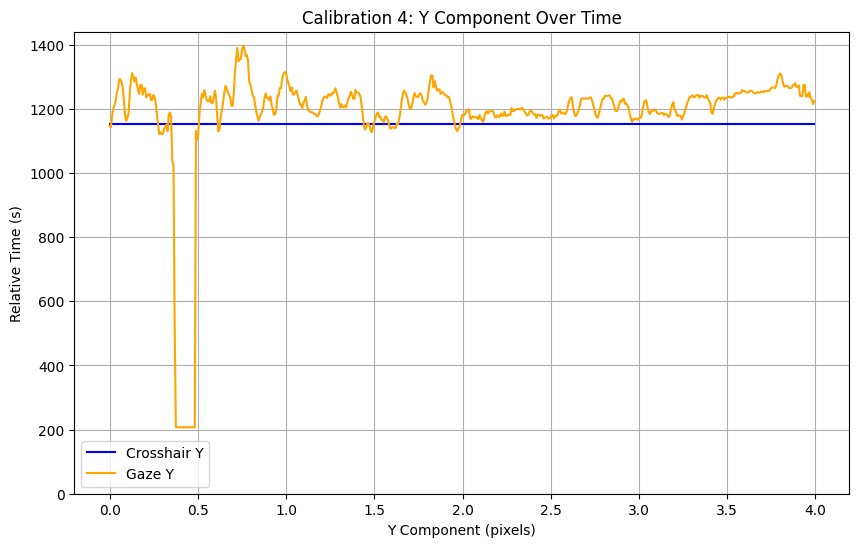

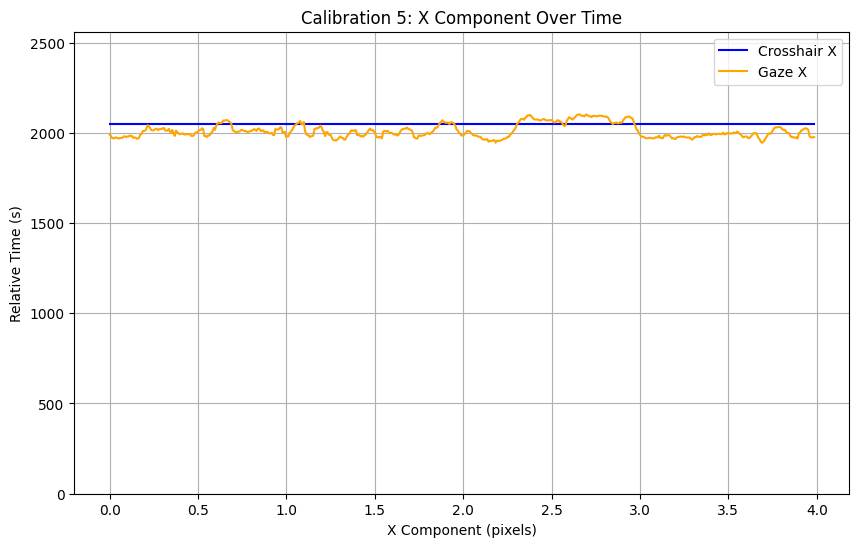

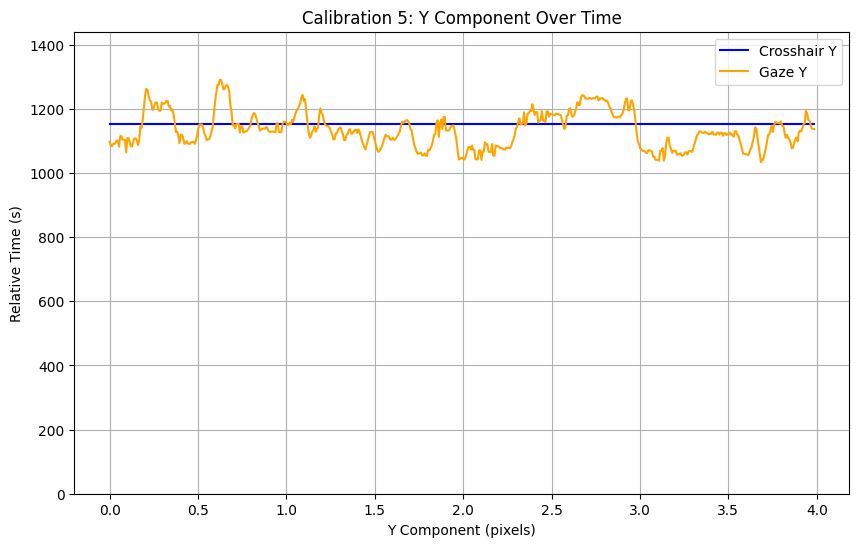

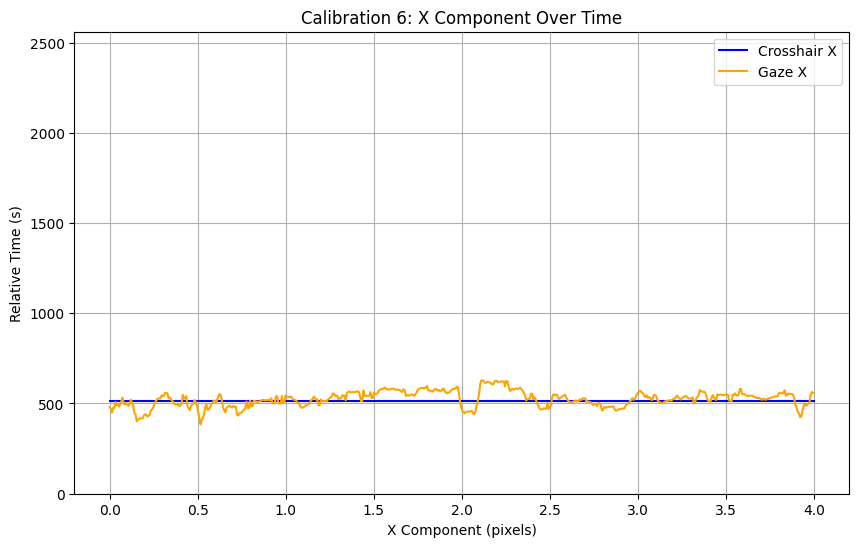

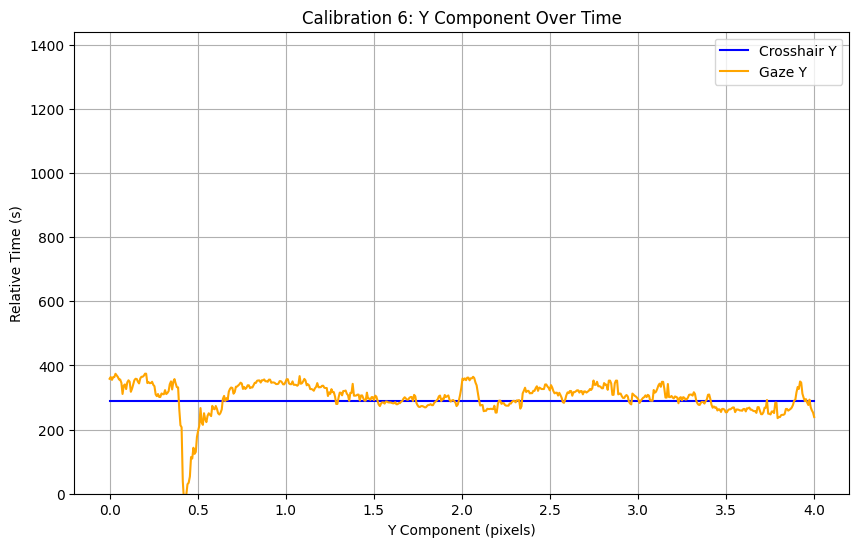

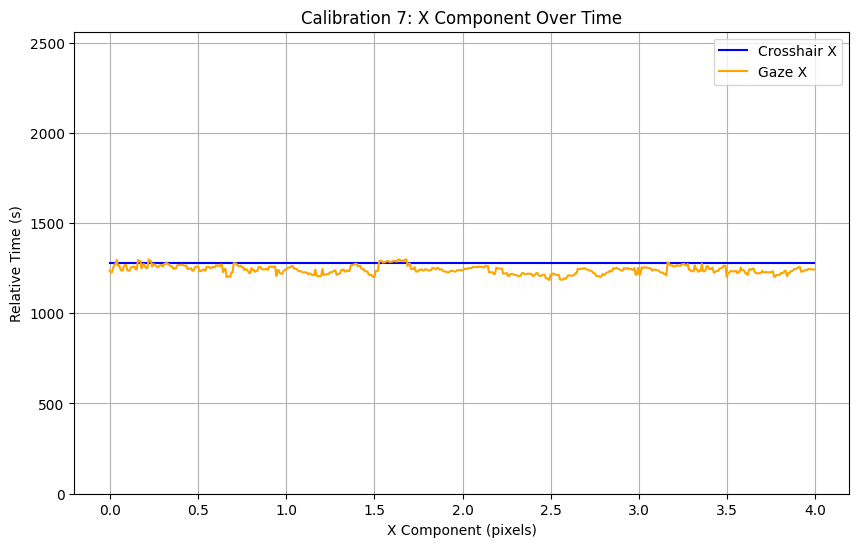

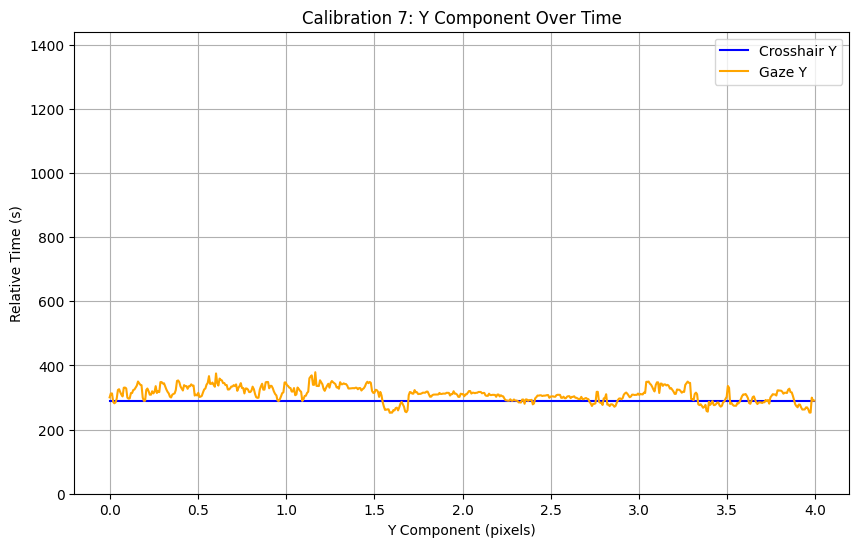

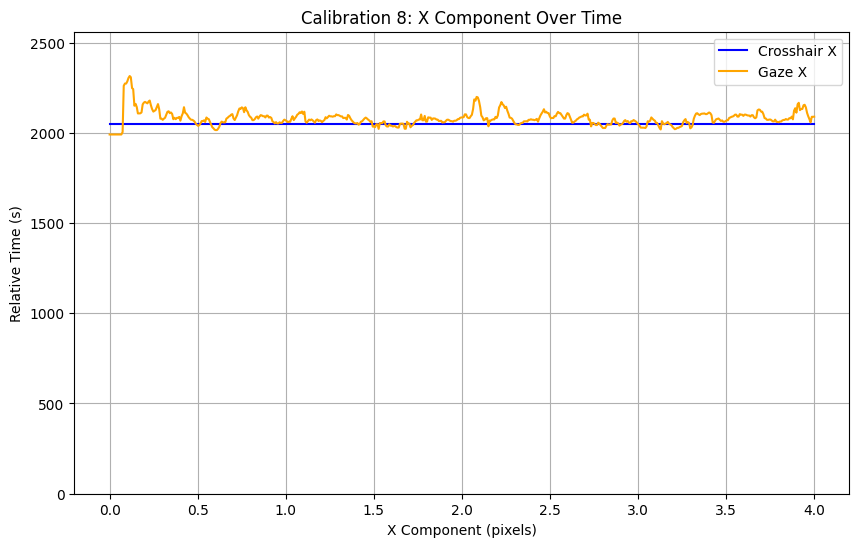

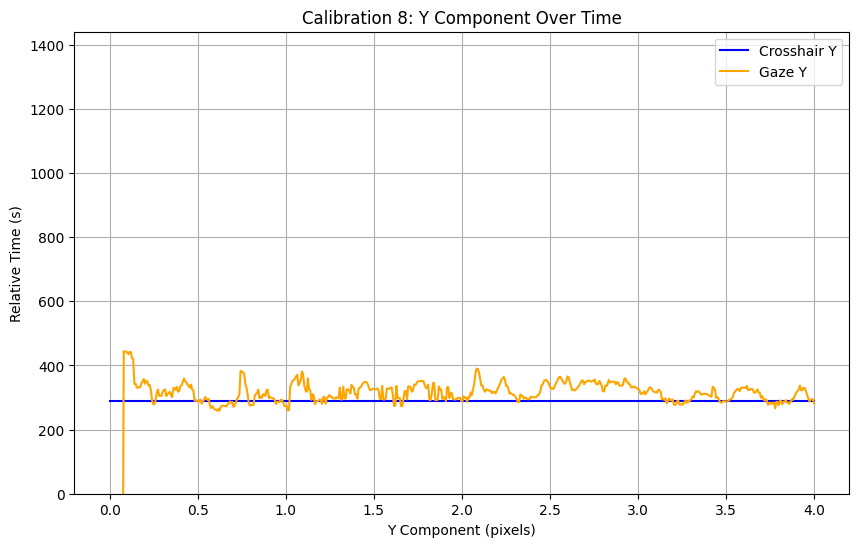

In [29]:
for calibration_number in data['CalibrationNumber'].unique():
    calibration_data = data[data['CalibrationNumber'] == calibration_number]

    # Plot X components over time
    plt.figure(figsize=(10, 6))
    plt.plot(calibration_data['RelativeTime'], calibration_data['CrosshairX'], label='Crosshair X', color='blue')
    plt.plot(calibration_data['RelativeTime'], calibration_data['MappedPogX'], label='Gaze X', color='orange')
    plt.title(f'Calibration {calibration_number}: X Component Over Time')
    plt.xlabel('X Component (pixels)')
    plt.ylabel('Relative Time (s)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, screen_width)
    plt.show()



    # Plot Y components over time
    plt.figure(figsize=(10, 6))
    plt.plot(calibration_data['RelativeTime'], calibration_data['CrosshairY'], label='Crosshair Y', color='blue')
    plt.plot(calibration_data['RelativeTime'], calibration_data['MappedPogY'], label='Gaze Y', color='orange')
    plt.title(f'Calibration {calibration_number}: Y Component Over Time')
    plt.xlabel('Y Component (pixels)')
    plt.ylabel('Relative Time (s)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, screen_height)
    plt.show()

